In [1]:
import lifetimes

In [2]:
import pandas as pd,numpy as np

In [3]:
df = pd.read_excel('clv.xlsx')
df.head()

,orderId,userId,order_date,GMV
0,1644787172704,bbed4d42-e4ff-41fa-93ed-4eb7800740b6,2022-02-14,5.00
1,1644787739942,99156e56-6078-46cc-b868-861326c6f7b8,2022-02-14,9.11
2,1644788102211,46cfba17-4662-4a3f-9c08-d13bf53b21cf,2022-02-14,52.30
3,1644788203923,d4e6450f-037c-4889-82d0-ceca9214119e,2022-02-14,9.48
4,1644788703589,89294631-8528-4dec-b1a4-fc2d22b80f2d,2022-02-14,13.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20878 entries, 0 to 20877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   orderId     20878 non-null  int64         
 1   userId      20878 non-null  object        
 2   order_date  20878 non-null  datetime64[ns]
 3   GMV         20853 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 652.6+ KB


In [5]:
df.shape

(20878, 4)

In [6]:
df.isnull().sum()

orderId        0
userId         0
order_date     0
GMV           25
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

orderId       0
userId        0
order_date    0
GMV           0
dtype: int64

In [9]:
df1=df.groupby(["userId","order_date"])["orderId"].value_counts()
df1.head(60)

userId                                order_date  orderId      
0001f853-db5f-442a-9457-d4d6593314ce  2022-01-17  1642404222621    1
0005c465-823c-4307-8c0f-ca427726cfd4  2022-01-06  1641437867654    1
0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21  2022-01-02  1641074921623    1
00192dcd-16fe-4e53-a08f-4122a3ae9a31  2022-01-01  1641001969173    1
                                                  1641006278759    1
00193179-9b65-4888-bf0b-09ad22c24b96  2022-02-05  1644030969465    1
                                      2022-02-10  1644474454046    1
001f141a-7704-429f-83a7-fe16617354ec  2021-09-07  1631008030269    1
                                      2021-09-10  1631254981163    1
                                      2021-10-06  1633489202636    1
                                      2021-10-15  1634261733853    1
                                      2021-11-07  1636264939930    1
                                      2021-11-30  1638258836884    1
                                      2

In [10]:
df2 = df[["userId","order_date","GMV"]]
df2

,userId,order_date,GMV
0,bbed4d42-e4ff-41fa-93ed-4eb7800740b6,2022-02-14,5.00
1,99156e56-6078-46cc-b868-861326c6f7b8,2022-02-14,9.11
2,46cfba17-4662-4a3f-9c08-d13bf53b21cf,2022-02-14,52.30
3,d4e6450f-037c-4889-82d0-ceca9214119e,2022-02-14,9.48
4,89294631-8528-4dec-b1a4-fc2d22b80f2d,2022-02-14,13.90
...,...,...,...
20873,aa5d35f4-d829-43c2-a4c7-57ee5088374a,2021-08-23,6.00
20874,5ef59f3a-f45a-4606-9117-c0fab36a25db,2021-08-23,19.80
20875,5ef59f3a-f45a-4606-9117-c0fab36a25db,2021-08-23,19.80
20876,aa5d35f4-d829-43c2-a4c7-57ee5088374a,2021-08-21,2.00


In [11]:
df2['order_date'] = pd.to_datetime(df2['order_date'])

In [12]:
print(df2['userId'].nunique())

8536


In [13]:
last_order_date = df2['order_date'].max()
print(last_order_date)

2022-02-14 00:00:00


In [14]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [15]:
df22 = summary_data_from_transaction_data(df2, 'userId', 'order_date', monetary_value_col='GMV', 
                                                observation_period_end='2022-02-14')


In [16]:
df22.reset_index().head()

,userId,frequency,recency,T,monetary_value
0,0001f853-db5f-442a-9457-d4d6593314ce,0.0,0.0,28.0,0.00
1,0005c465-823c-4307-8c0f-ca427726cfd4,0.0,0.0,39.0,0.00
2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,0.0,0.0,43.0,0.00
3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,0.0,0.0,44.0,0.00
4,00193179-9b65-4888-bf0b-09ad22c24b96,1.0,5.0,9.0,51.65


In [17]:
df22.head(60)

,frequency,recency,T,monetary_value
userId,,,,
0001f853-db5f-442a-9457-d4d6593314ce,0.0,0.0,28.0,0.000000
0005c465-823c-4307-8c0f-ca427726cfd4,0.0,0.0,39.0,0.000000
0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,0.0,0.0,43.0,0.000000
00192dcd-16fe-4e53-a08f-4122a3ae9a31,0.0,0.0,44.0,0.000000
00193179-9b65-4888-bf0b-09ad22c24b96,1.0,5.0,9.0,51.650000
001f141a-7704-429f-83a7-fe16617354ec,7.0,105.0,160.0,24.985714
00228990-f88d-4d56-bbef-598e836a7161,0.0,0.0,43.0,0.000000
002a236a-77fa-4a56-b28d-95ccbe49d4be,2.0,31.0,35.0,17.000000
002aab74-31ee-4ad9-be46-12b78da2bd90,10.0,87.0,98.0,39.862000


In [18]:
df22.shape

(8536, 4)

In [44]:
print(df2[(df2['userId']=="002aab74-31ee-4ad9-be46-12b78da2bd90")])

                                     userId order_date    GMV
2414   002aab74-31ee-4ad9-be46-12b78da2bd90 2022-02-03  55.94
4398   002aab74-31ee-4ad9-be46-12b78da2bd90 2022-01-26  39.15
5189   002aab74-31ee-4ad9-be46-12b78da2bd90 2022-01-22  21.00
6622   002aab74-31ee-4ad9-be46-12b78da2bd90 2022-01-19  68.56
10217  002aab74-31ee-4ad9-be46-12b78da2bd90 2022-01-12  58.77
12078  002aab74-31ee-4ad9-be46-12b78da2bd90 2022-01-05  27.40
16222  002aab74-31ee-4ad9-be46-12b78da2bd90 2021-12-16  61.00
16885  002aab74-31ee-4ad9-be46-12b78da2bd90 2021-12-12  38.25
18062  002aab74-31ee-4ad9-be46-12b78da2bd90 2021-11-29  15.25
19187  002aab74-31ee-4ad9-be46-12b78da2bd90 2021-11-10  13.30
19261  002aab74-31ee-4ad9-be46-12b78da2bd90 2021-11-08  20.35


count    8536.000000
mean        1.280225
std         3.136678
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        60.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 58.33 %


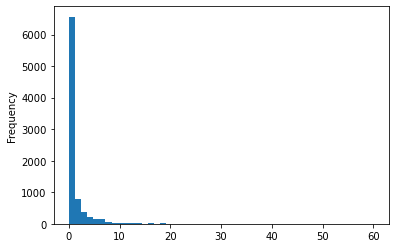

In [45]:
df22['frequency'].plot(kind='hist', bins=50)
print(df22['frequency'].describe())


print("---------------------------------------")

one_time_buyers = round(sum(df22['frequency'] == 0)/float(len(df22))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [46]:
#Frequency/Recency Analysis Using the BG/NBD Model
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(df22['frequency'], df22['recency'], df22['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 8536 subjects, a: 0.51, alpha: 8.09, b: 1.75, r: 0.34>


In [47]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.337484,0.010002,0.317881,0.357087
alpha,8.090402,0.365368,7.374280,8.806524
a,0.508744,0.050941,0.408900,0.608588
b,1.746223,0.225744,1.303765,2.188681


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

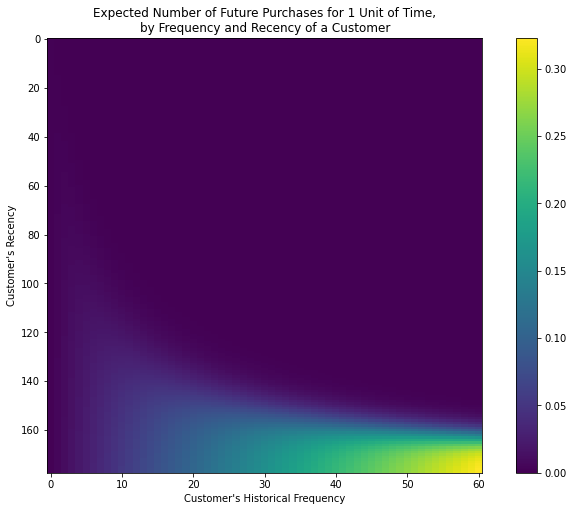

In [48]:
#Visualizing our frequency/recency matrix
%matplotlib inline
import matplotlib.pyplot as plt
from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

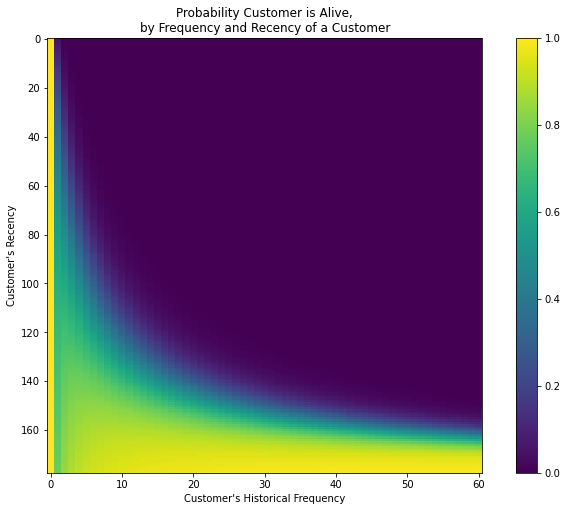

In [49]:
#predict if the customers are surely alive:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [50]:
#Predict future transaction in next 10 days i.e.top 10 customers that the model expects them to make purchases 
#in the next 10 days, based on historical data

t = 10
df22['pred_num_orders'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                           df22['frequency'], 
                                                                                           df22['recency'], 
                                                                                           df22['T']),2)
df22.sort_values(by='pred_num_orders', ascending=False).head(60).reset_index()

,userId,frequency,recency,T,monetary_value,pred_num_orders
0,e030e803-7919-4d34-899f-3b2af56ebb80,52.0,89.0,89.0,24.123077,5.21
1,0ab936e4-d71e-4e33-a6c0-32d93720cbb7,44.0,79.0,79.0,28.220455,4.90
2,b60ee8bd-300f-418d-acd3-775e55fd033b,30.0,63.0,63.0,17.453000,4.06
3,ef1b0884-04fa-426c-883a-47aebac042c3,24.0,50.0,50.0,27.702500,3.94
4,e3119234-5176-4954-86a1-d4a81649c30b,43.0,90.0,96.0,10.255116,3.53
5,d4e6450f-037c-4889-82d0-ceca9214119e,52.0,142.0,142.0,14.577885,3.40
6,dbd6726e-3565-4176-a30d-cb833a7ce3e4,24.0,63.0,63.0,8.841667,3.25
7,2d85c915-7869-4b8e-995d-0000b89ae81b,14.0,27.0,30.0,491.505000,3.20
8,c149e291-b45e-4e0d-bc47-eebcdd1468e0,20.0,50.0,51.0,26.894000,3.20
9,ee28d1ab-d298-4830-a575-9d78bcc5fb3e,9.0,16.0,17.0,7.127778,3.18


<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

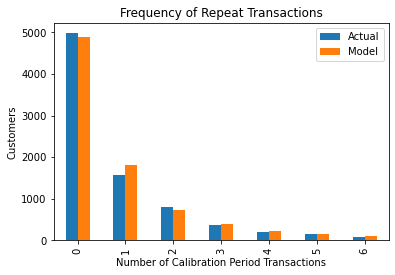

In [51]:

#Assessing model fit
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [52]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation.
df22[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.193201
frequency,0.193201,1.000000


In [53]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = df22[df22['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

                                 userId  frequency  recency      T  \
0  00193179-9b65-4888-bf0b-09ad22c24b96        1.0      5.0    9.0   
1  001f141a-7704-429f-83a7-fe16617354ec        7.0    105.0  160.0   
2  002a236a-77fa-4a56-b28d-95ccbe49d4be        2.0     31.0   35.0   
3  002aab74-31ee-4ad9-be46-12b78da2bd90       10.0     87.0   98.0   
4  002bc7a6-89ab-443a-9ecc-9c038b584807        3.0     43.0   58.0   

   monetary_value  pred_num_orders  
0       51.650000             0.50  
1       24.985714             0.20  
2       17.000000             0.42  
3       39.862000             0.83  
4       20.933333             0.37  
-----------------------------------------
The Number of Returning Customers are:  3557


In [54]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 3557 subjects, p: 2.64, q: 3.24, v: 34.90>


In [55]:
print(ggf.conditional_expected_average_profit(
        df22['frequency'],
        df22['monetary_value']
    ).head(60))

userId
0001f853-db5f-442a-9457-d4d6593314ce    41.124621
0005c465-823c-4307-8c0f-ca427726cfd4    41.124621
0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21    41.124621
00192dcd-16fe-4e53-a08f-4122a3ae9a31    41.124621
00193179-9b65-4888-bf0b-09ad22c24b96    46.818162
001f141a-7704-429f-83a7-fe16617354ec    26.730768
00228990-f88d-4d56-bbef-598e836a7161    41.124621
002a236a-77fa-4a56-b28d-95ccbe49d4be    24.187054
002aab74-31ee-4ad9-be46-12b78da2bd90    39.960770
002bc7a6-89ab-443a-9ecc-9c038b584807    25.385641
0033b3ee-1f56-4eac-ad5d-3b61e5a0dfb9    55.792267
0033bebf-7c65-4d02-88d2-b00efd4cf341    41.124621
0036f41c-4556-400b-b98d-1e79769c00d3    31.591980
00379098-914f-44ed-b15d-03f49f7cc2f6    19.526447
00473a04-da9b-4023-af17-05d922b8cd40    30.238518
00495624-82c3-4922-910c-65a65d820034    18.135375
0050c316-2135-44ca-b7a8-5d378a375cf6    41.124621
005726d3-a282-4556-a6ed-c60112e456da    41.124621
005feb74-56e2-4990-a024-41031dd09d17    41.124621
006204c9-8898-4b90-a3fc-c74c4edc0103    41.

In [56]:
df22['pred_gmv_value'] = round(ggf.conditional_expected_average_profit(
        df22['frequency'],
        df22['monetary_value']), 2)


df22.sort_values(by='pred_num_orders', ascending=False).head(60).reset_index()

,userId,frequency,recency,T,monetary_value,pred_num_orders,pred_gmv_value
0,e030e803-7919-4d34-899f-3b2af56ebb80,52.0,89.0,89.0,24.123077,5.21,24.40
1,0ab936e4-d71e-4e33-a6c0-32d93720cbb7,44.0,79.0,79.0,28.220455,4.90,28.46
2,b60ee8bd-300f-418d-acd3-775e55fd033b,30.0,63.0,63.0,17.453000,4.06,18.10
3,ef1b0884-04fa-426c-883a-47aebac042c3,24.0,50.0,50.0,27.702500,3.94,28.16
4,e3119234-5176-4954-86a1-d4a81649c30b,43.0,90.0,96.0,10.255116,3.53,10.85
5,d4e6450f-037c-4889-82d0-ceca9214119e,52.0,142.0,142.0,14.577885,3.40,15.00
6,dbd6726e-3565-4176-a30d-cb833a7ce3e4,24.0,63.0,63.0,8.841667,3.25,9.94
7,2d85c915-7869-4b8e-995d-0000b89ae81b,14.0,27.0,30.0,491.505000,3.20,465.76
8,c149e291-b45e-4e0d-bc47-eebcdd1468e0,20.0,50.0,51.0,26.894000,3.20,27.47
9,ee28d1ab-d298-4830-a575-9d78bcc5fb3e,9.0,16.0,17.0,7.127778,3.18,10.06


In [57]:
df22.to_csv('Solution.csv')

In [58]:
#Calculate Customer Lifetime Value
df22['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    df22['frequency'],
    df22['recency'],
    df22['T'],
    df22['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

df22.drop(df22.iloc[:, 0:6], inplace=True, axis=1)

df22.sort_values(by='CLV', ascending=False).head(10).reset_index()

,userId,CLV
0,2d85c915-7869-4b8e-995d-0000b89ae81b,25643.55
1,8fd6ea90-3289-456e-a7b4-fc32c8ba2045,7572.83
2,d0041d27-ec52-447c-b37b-e4a9808bace6,6270.43
3,74d47c00-2714-4a81-afad-da78a36713db,5042.21
4,6ced92f6-d0ab-4108-bc51-ca192aa0e493,4863.35
5,13d41a9f-3394-4c60-87ee-b597b7e3f369,4295.38
6,b3c0efb6-c532-4499-a0df-060f8c136e94,3938.21
7,2f65f5a0-644c-4820-8cd2-54e0e4294b07,3770.70
8,c026bbce-1f39-4fcd-8041-21f30f007f40,3319.23
9,0ab936e4-d71e-4e33-a6c0-32d93720cbb7,2978.73
